# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sebs1\AppData\Roaming\nltk_data...


In [6]:
!pip install newsapi-python

In [8]:
# Read your api key environment variable


In [18]:
# Create a newsapi client
from newsapi.newsapi_client import NewsApiClient
newsapi = NewsApiClient(api_key='5d012a9b9bd540a4b72d249ce7db6a11')
print(newsapi)

In [19]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy')
btc_articles['totalResults']

6513

In [20]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum',
                                      language='en',
                                      sort_by='relevancy')
eth_articles['totalResults']

2973

In [21]:
def get_sentiment_score(article, based_on):
    sentiments = []

    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                based_on : text
            })

        except AttributeError:
            pass

    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

In [26]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = get_sentiment_score(btc_articles, 'content')

In [33]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment = get_sentiment_score(eth_articles, 'content')

In [34]:
# Describe the Bitcoin Sentiment
btc_sentiment.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.00000
mean,0.182980,0.033500,0.891250,0.07525
std,0.448631,0.068998,0.067822,0.06384
min,-0.886000,0.000000,0.729000,0.00000
25%,0.000000,0.000000,0.846000,0.00000
50%,0.314100,0.000000,0.904500,0.08150
75%,0.525925,0.043000,0.917750,0.10825
max,0.718400,0.271000,1.000000,0.20000


In [36]:
# Describe the Ethereum Sentiment
eth_sentiment.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.00000
mean,0.175475,0.026400,0.905350,0.06820
std,0.414882,0.072668,0.078087,0.06409
min,-0.893400,0.000000,0.688000,0.00000
25%,0.000000,0.000000,0.859500,0.00000
50%,0.226300,0.000000,0.920000,0.06200
75%,0.445000,0.000000,0.953250,0.10750
max,0.735100,0.312000,1.000000,0.19000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [48]:
!pip install nltk

In [64]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
nltk.download('wordnet')
import re

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sebs1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [65]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = set(stopwords.words('english'))

In [66]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean.lower())
    
    # Convert the words to lowercase and Remove the stop words
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize Words into root words
    root_words = [lemmatizer.lemmatize(word) for word in words]
    
    return root_words

In [67]:
# Create a new tokens column for Bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)

In [68]:
# Create a new tokens column for Ethereum
eth_sentiment_df['tokens'] = eth_sentiment_df['content'].apply(tokenizer)

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [69]:
from collections import Counter
from nltk import ngrams

In [70]:
# Generate the Bitcoin N-grams where N=2
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens


btc_tokens = get_tokens(btc_sentiment_df)
eth_tokens = get_tokens(eth_sentiment_df)

In [73]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=11):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [74]:
# Use token_count to get the top 10 words for Bitcoin
top_10_token_btc = token_count(btc_tokens)
top_10_token_btc

[('char', 20),
 ('bitcoin', 10),
 ('cryptocurrency', 9),
 ('first', 7),
 ('customer', 5),
 ('allow', 4),
 ('data', 4),
 ('reuters', 4),
 ('paypal', 3),
 ('buy', 3),
 ('hold', 3)]

In [75]:
# Use token_count to get the top 10 words for Ethereum
top_10_token_eth = token_count(eth_tokens)
top_10_token_eth

[('char', 20),
 ('ethereum', 11),
 ('cryptocurrency', 6),
 ('crypto', 5),
 ('network', 5),
 ('ether', 5),
 ('bitcoin', 5),
 ('reuters', 4),
 ('blockchain', 3),
 ('u', 3),
 ('first', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

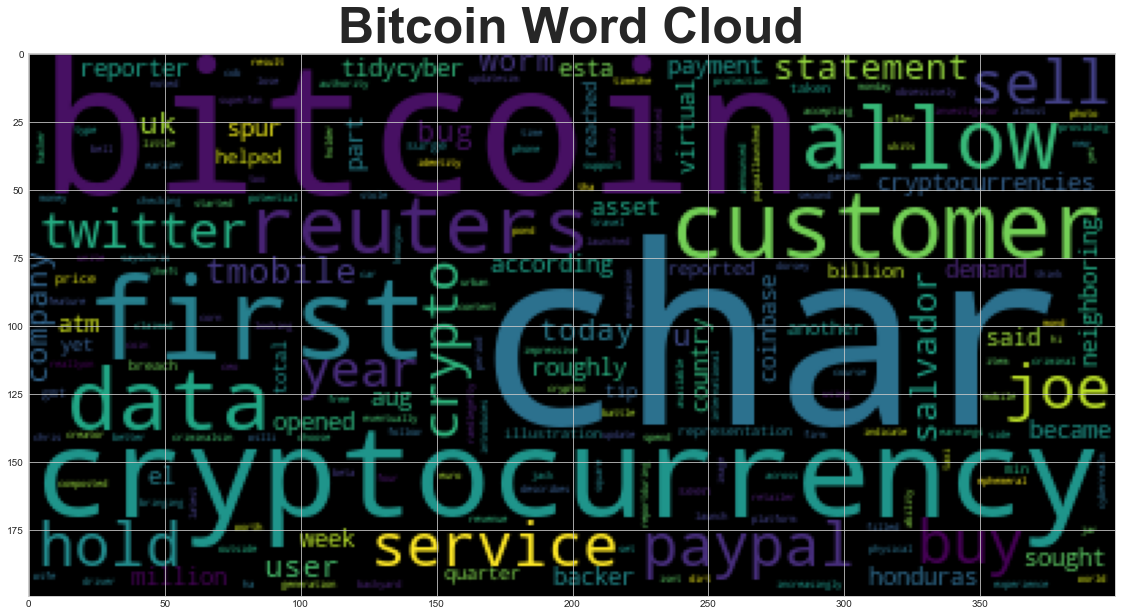

In [82]:
# Generate the Bitcoin word cloud
bit_word_cloud = WordCloud(collocations=False).generate(' '.join(btc_tokens))
plt.imshow(bit_word_cloud)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

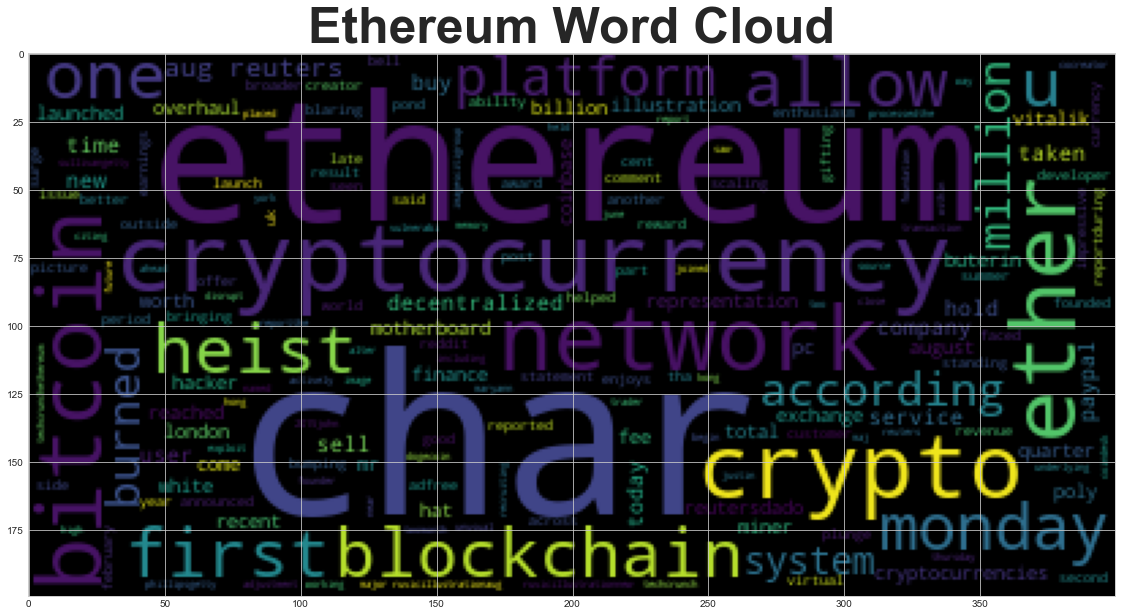

In [84]:
# Generate the Ethereum word cloud
eth_word_cloud = WordCloud().generate(' '.join(eth_tokens))
plt.imshow(eth_word_cloud)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 50, 'fontweight':'bold'})

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [87]:
import spacy
from spacy import displacy

In [89]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-09-01 10:09:17.305173: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-09-01 10:09:17.305202: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [91]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [92]:
# Concatenate all of the Bitcoin text together
bit = ' '.join(btc_sentiment_df['content'])

In [98]:
# Run the NER processor on all of the text
doc= nlp(bit)

# Add a title to the document
doc.user_data["title"] = "BTC NER"

In [99]:
# Render the visualization
displacy.render(doc, style='ent')

In [100]:
# List all Entities

for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

U.S. GPE
first ORDINAL
today DATE
U.K. GPE
Joe Raedle PERSON
Twitter PRODUCT
Square PRODUCT
Jack Dorsey PERSON
Monday DATE
a year DATE
US GPE
Joe TidyCyber PERSON
Chris PERSON
almost 2,500 CARDINAL
2,100 MONEY
Chris PERSON
Joe TidyCyber PERSON
UK GPE
first ORDINAL
four CARDINAL
T-Mobile ORG
two years DATE
roughly 49 million CARDINAL
Reuters ORG
first ORDINAL
ATM ORG
Honduras GPE
this week DATE
El Salvador GPE
first ORDINAL
Reuters ORG
first ORDINAL
ATM ORG
Honduras GPE
this week DATE
El Salvador GPE
first ORDINAL
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
Twitter PERSON
Tip Jar WORK_OF_ART
Twitter PERSON
earlier this year DATE
first ORDINAL
$311 billion MONEY
Q2 2021 DATE
Insider Intellige PERSON
August 6, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug PERSON
20 CARDINAL
Reuters ORG
5.01 % PERCENT
49,106.4 MONEY
22:04 GMT TIME
Friday DATE
Motherboard PERSON
August DATE
20, 2021 DATE
PennyStocksBitcoin Price Surge Helped Boost 

---

### Ethereum NER

In [101]:
# Concatenate all of the Ethereum text together
et = ' '.join(eth_sentiment_df['content'])

In [102]:
# Run the NER processor on all of the text
doc= nlp(et)

# Add a title to the document
doc.user_data["title"] = "Eth NER"

In [103]:
# Render the visualization
displacy.render(doc, style='ent')

In [104]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

late summer DATE
2017 DATE
Reddit NORP
Ethereum PERSON
U.S. GPE
first ORDINAL
today DATE
U.K. GPE
a year DATE
US GPE
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
Ethereum PERSON
February 3, 2018 DATE
REUTERS ORG
Dado Ruvic PERSON
Aug 5 DATE
Reuters ORG
One CARDINAL
Monday DATE
Poly Network ORG
White PERSON
HONG KONG GPE
Aug 5 DATE
Reuters ORG
two-month DATE
Thursday DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
Vitalik Buterin PERSON
TechCrunch Disrupt London 2015 ORG
John Phillips PERSON
Vitalik Buterin PERSON
Justin Sullivan PERSON
Getty Images
Citigroup ORG
CoinDesk PRODUCT
two CARDINAL
one CARDINAL
BBC News ORG
almost half CARDINAL
$600m MONEY
433 MONEY
Yesterday DATE
LONDON GPE
Aug 25 DATE
Reuters ORG
September DATE
first ORDINAL
$311 billion MONEY
Q2 2021 DATE
Insider Intellige PERSON
Solana PERSON
above $100 MONEY
first ORDINAL
Monday DATE
more than 200% 

---